# 七阶段双S型曲线公式推导

In [2]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

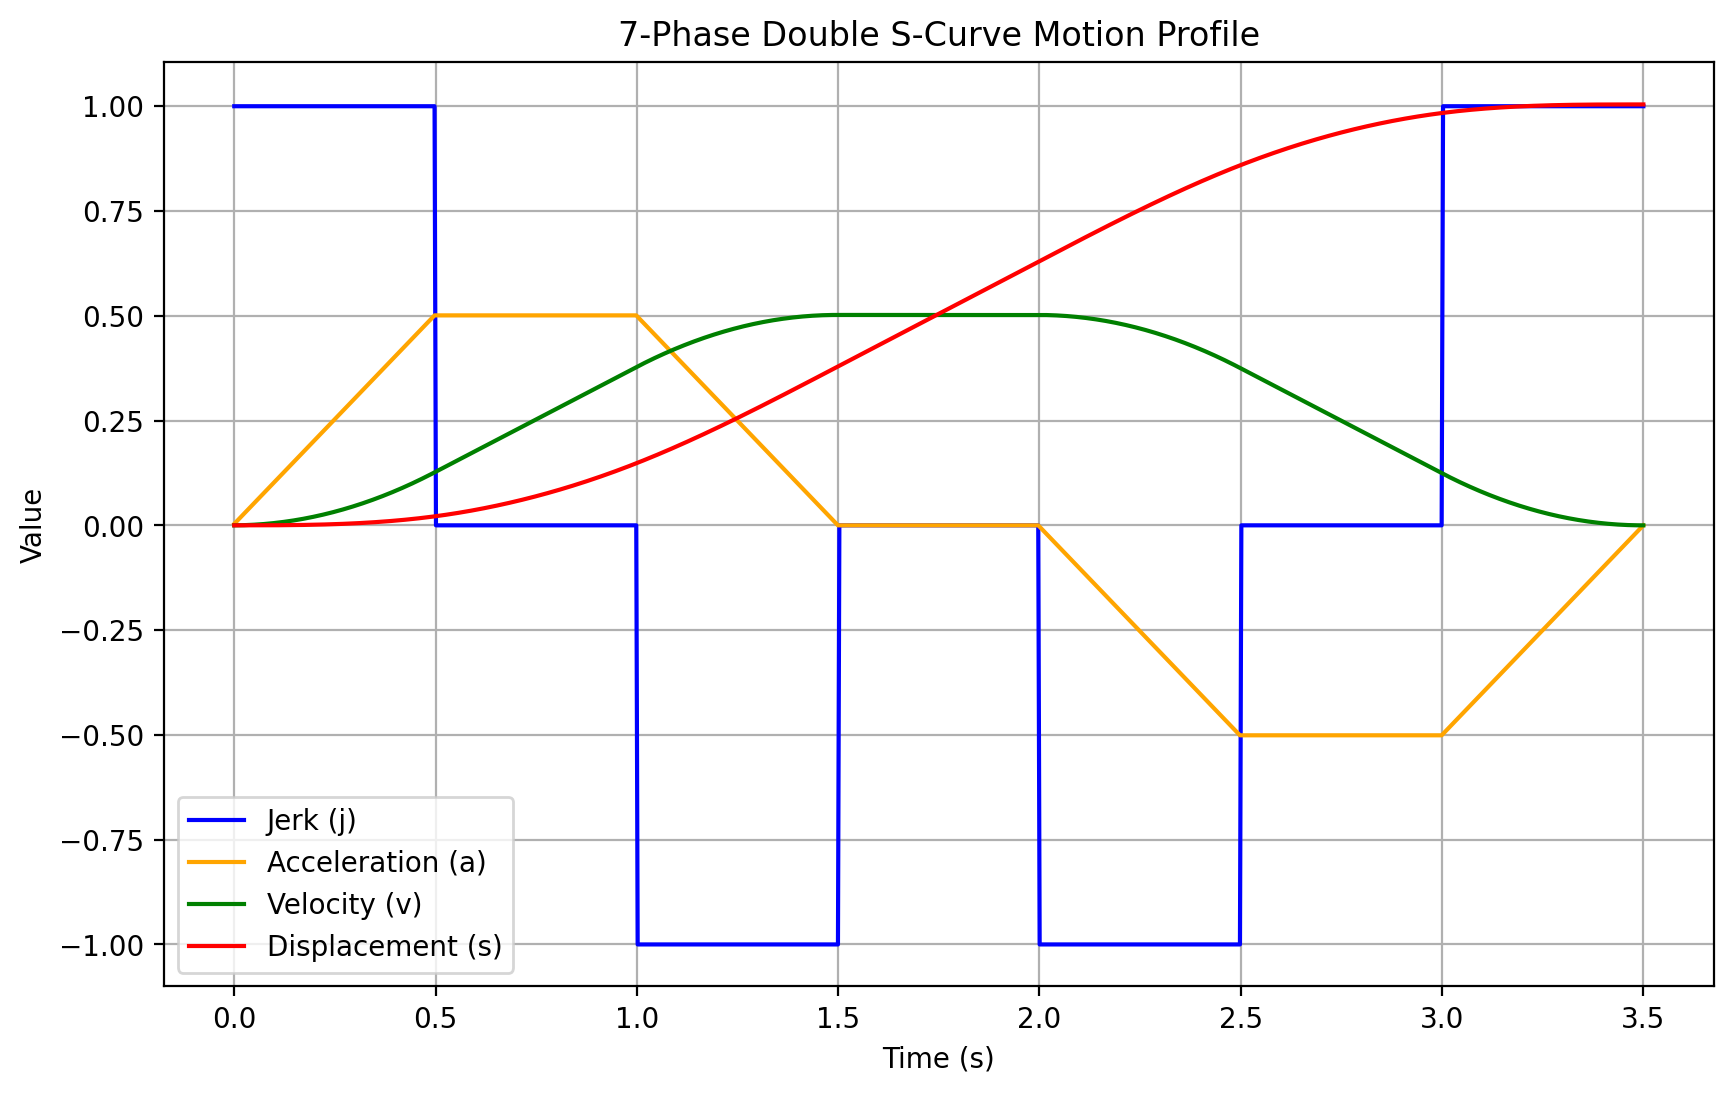

In [3]:
import numpy as np

# Define the time intervals
t1, t2, t3, t4, t5, t6, t7 = 0.5, 1, 1.5, 2, 2.5, 3, 3.5

# Create a time axis
t = np.linspace(0, t7, 1000)

# Define the jerk for each phase
j = np.piecewise(
    t,
    [
        t < t1,
        (t >= t1) & (t < t2),
        (t >= t2) & (t < t3),
        (t >= t3) & (t < t4),
        (t >= t4) & (t < t5),
        (t >= t5) & (t < t6),
        t >= t6,
    ],
    [1, 0, -1, 0, -1, 0, 1],
)

# Integrate to get acceleration
a = np.cumsum(j) * (t[1] - t[0])
# a = a - np.min(a)

# Integrate again to get velocity
v = np.cumsum(a) * (t[1] - t[0])

# Finally integrate to get displacement
s = np.cumsum(v) * (t[1] - t[0])

# Plot all curves on the same graph
plt.figure(figsize=(10, 6))

plt.plot(t, j, label="Jerk (j)", color="blue")
plt.plot(t, a, label="Acceleration (a)", color="orange")
plt.plot(t, v, label="Velocity (v)", color="green")
plt.plot(t, s, label="Displacement (s)", color="red")

plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("7-Phase Double S-Curve Motion Profile")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [4]:
# 导入所需的库
from sympy import symbols, integrate, latex, Function, Eq, simplify, sympify
from sympy import init_printing

import numpy as np

init_printing(use_unicode=True)


def compute_motion(jerk, t_var, initial_conditions):
    """通过积分计算加速度、速度和位移"""
    a_0, v_0, s_0 = initial_conditions
    a = integrate(jerk, t_var) + a_0
    v = integrate(a, t_var) + v_0
    s = integrate(v, t_var) + s_0
    return a, v, s


def compute_trajectory(jerks, times, initial_conditions, t_var):
    """代入各个阶段的jerks,和初始运动条件,计算整个运动过程

    Args:
        jerks: 在每个阶段的jerk值, 为常值
        times: 每个阶段的时间
        initial_conditions: 初始条件, 为加速度、速度、位移
        t_var: 时间变量
    """
    results = {"j": [], "a": [], "v": [], "s": []}

    for i, jerk in enumerate(jerks):
        a, v, s = compute_motion(jerk, t_var, initial_conditions)
        results["j"].append((jerk, times[i]))
        results["a"].append((a, times[i]))
        results["v"].append((v, times[i]))
        results["s"].append((s, times[i]))
        initial_conditions = [a.subs(t_var, times[i]), v.subs(t_var, times[i]), s.subs(t_var, times[i])]

    return results


def show_results(results, show_tex=False):
    """显示运动过程的结果"""

    def show_eq(eq):
        eq_spf = simplify(eq)
        if show_tex:
            print(latex(eq_spf))
        else:
            display(eq_spf)

    t_var = symbols("t")
    for i, (a, v, s) in enumerate(zip(results["a"], results["v"], results["s"])):
        print(f"\n====== 第{i+1}阶段 ======")
        t_i = a[1]
        show_eq(Eq(Function("a")(t_var), a[0]))
        show_eq(Eq(Function(f"a_{i+1}")(t_i), a[0].subs(t_var, t_i)))
        show_eq(Eq(Function("v")(t_var), v[0]))
        show_eq(Eq(Function(f"v_{i+1}")(t_i), v[0].subs(t_var, t_i)))
        show_eq(Eq(Function("s")(t_var), s[0]))
        show_eq(Eq(Function(f"s_{i+1}")(t_i), s[0].subs(t_var, t_i)))

## Type (VII)


====== 第1阶段 ======


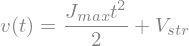

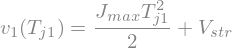

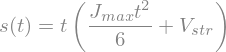

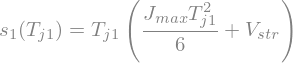


====== 第2阶段 ======


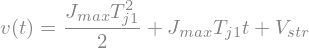

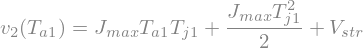

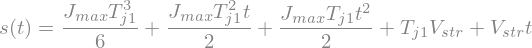

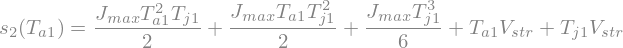


====== 第3阶段 ======


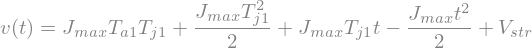

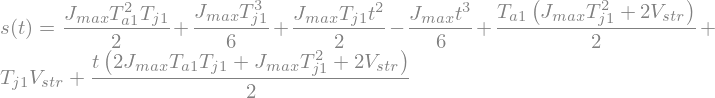

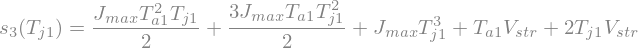


====== 第4阶段 ======


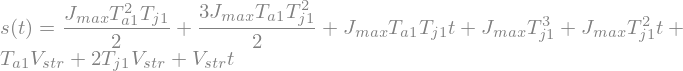

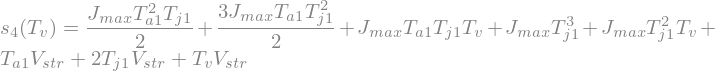


====== 第5阶段 ======


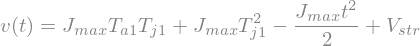

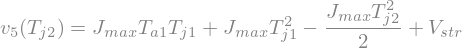

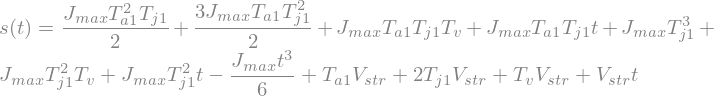

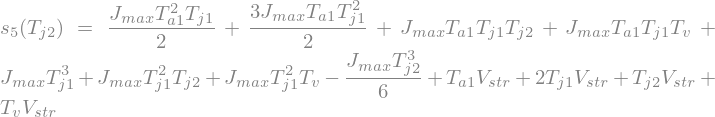


====== 第6阶段 ======


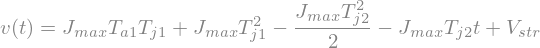

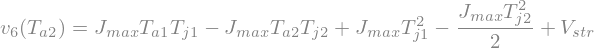

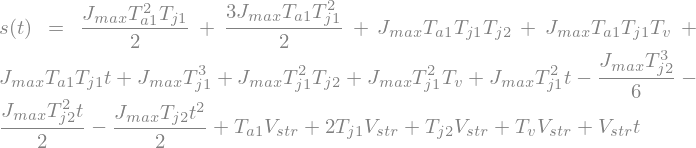

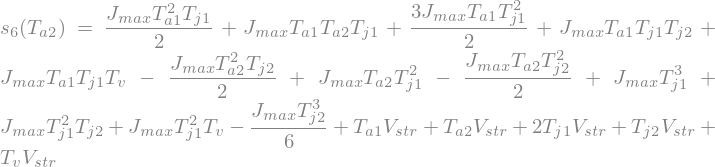


====== 第7阶段 ======


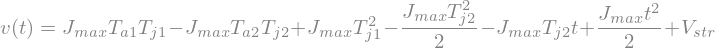

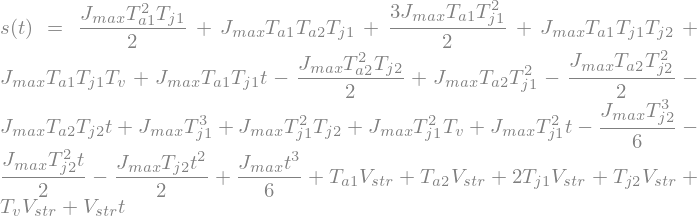

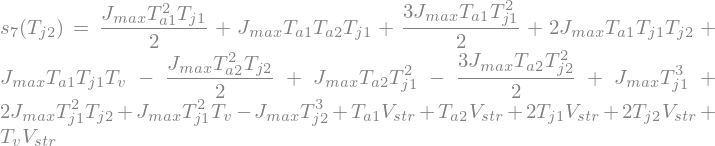

In [4]:
# 定义符号变量
t = symbols("t")
J_max, V_str, T_j1, T_a1, T_v, T_j2, T_a2 = symbols("J_max V_str T_j1 T_a1 T_v T_j2 T_a2")

# 定义加加速度和阶段持续时间
jerks = [J_max, sympify("0"), -J_max, sympify("0"), -J_max, sympify("0"), J_max]
times = [T_j1, T_a1, T_j1, T_v, T_j2, T_a2, T_j2]
initial_conditions = [sympify("0"), V_str, sympify("0")]

# 计算运动过程
results = compute_trajectory(jerks, times, initial_conditions, t)

# 打印结果
show_results(results)

## Phase 1


====== 第1阶段 ======


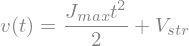

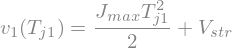

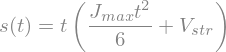

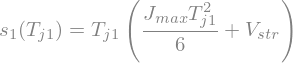

In [5]:
# 定义符号变量
t = symbols("t")
J_max, V_str, T_j1, T_a1, T_v, T_j2, T_a2 = symbols("J_max V_str T_j1 T_a1 T_v T_j2 T_a2")

# 定义加加速度和阶段持续时间
jerks = [J_max]
times = [T_j1]
initial_conditions = [sympify("0"), V_str, sympify("0")]

# 计算运动过程
results = compute_trajectory(jerks, times, initial_conditions, t)

# 打印结果
show_results(results)

## Phase 2


====== 第1阶段 ======


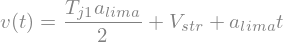

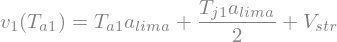

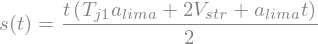

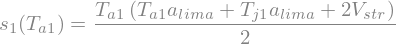

In [8]:
# 定义符号变量
t = symbols("t")
J_max, V_str, T_j1, T_a1, T_v, T_j2, T_a2 = symbols("J_max V_str T_j1 T_a1 T_v T_j2 T_a2")
a_lim_a = symbols("a_lim_a")
# 定义加加速度和阶段持续时间
jerks = [sympify("0")]
times = [T_a1]
v0 = a_lim_a * T_j1 / 2 + V_str
initial_conditions = [a_lim_a, v0, sympify("0")]

# 计算运动过程
results = compute_trajectory(jerks, times, initial_conditions, t)

# 打印结果
show_results(results)

## Phase 3


====== 第1阶段 ======


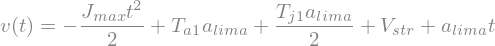

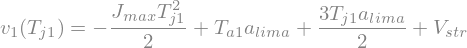

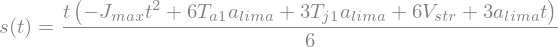

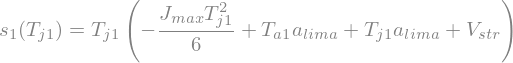

In [10]:
# 定义符号变量
t = symbols("t")
J_max, V_str, T_j1, T_a1, T_v, T_j2, T_a2 = symbols("J_max V_str T_j1 T_a1 T_v T_j2 T_a2")
a_lim_a = symbols("a_lim_a")
# 定义加加速度和阶段持续时间
jerks = [-J_max]
times = [T_j1]
v0 = T_a1 * a_lim_a + T_j1 * a_lim_a / 2 + V_str
initial_conditions = [a_lim_a, v0, sympify("0")]

# 计算运动过程
results = compute_trajectory(jerks, times, initial_conditions, t)

# 打印结果
show_results(results)